# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [2]:
student_data = pd.DataFrame({'Age': [17,51,27,21,36,48,19,26,54,30], 'Tardies': [10,1,5,9,4,2,9,6,0,3]})

Draw a dispersion diagram (scatter plot) for the data.

Text(0, 0.5, 'Tardies')

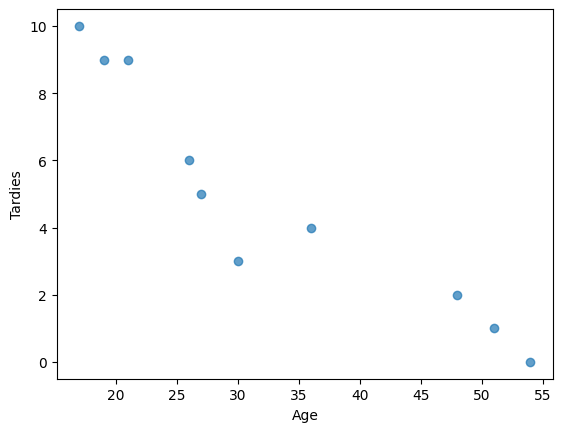

In [5]:
X = student_data['Age']
y = student_data['Tardies']

plt.plot(X, y, "o", alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

I can see a trend, as student's age increases, tardies decreases. Meaning there is an inverse proportional relanshioship between age and tardies

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [9]:
student_data.cov()

,Age,Tardies
Age,187.655556,-45.566667
Tardies,-45.566667,12.544444


In [10]:
student_data.corr()

,Age,Tardies
Age,1.000000,-0.939163
Tardies,-0.939163,1.000000


In [ ]:
#We can see that Tardies and Age have a very strong correlation. It mean they are correlated.
#Age and Tardies: The covariance is -45.566667, indicating a negative relationship. As age increases, the number of tardies tends to decrease.

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [ ]:
# We are using a linear regression because the relationship between Years and Tardies is a straight line

Plot your regression model on your scatter plot.

Slope (coefficient): -0.2428207709159809
Intercept: 12.888803363135771


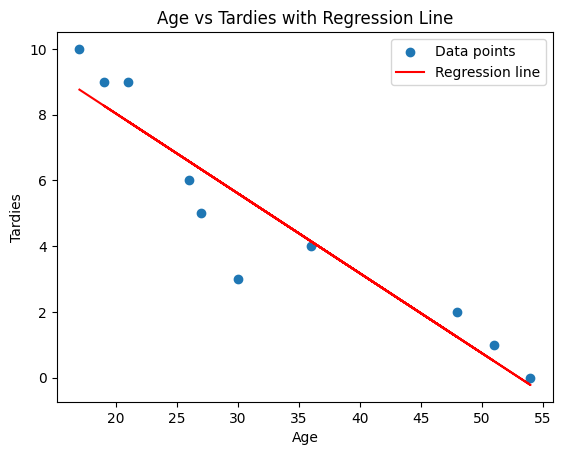

In [37]:
# We are using the simple linear regression
# Reshape the data to fit the model
X = student_data['Age'].values.reshape(-1, 1)
y = student_data['Tardies'].values

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_
print(f'Slope (coefficient): {slope}')
print(f'Intercept: {intercept}')

# Predict y values
y_pred = model.predict(X)

# Scatter plot
plt.scatter(student_data['Age'], student_data['Tardies'], label='Data points')

# Regression line
plt.plot(student_data['Age'], y_pred, color='red', label='Regression line')
plt.xlabel('Age')
plt.ylabel('Tardies')
plt.title('Age vs Tardies with Regression Line')
plt.legend()
plt.show()

In [39]:
# Age for which you want to predict tardies
age_to_predict = 27
# Reshape the age value into a 2D array
age_to_predict_reshaped = np.array(age_to_predict).reshape(-1, 1)
# Use the model to predict tardies for the given age
predicted_tardies = model.predict(age_to_predict_reshaped)
# Print the predicted number of tardies
print(f'Predicted Tardies for an Age of 32: {predicted_tardies[0]}')

Predicted Tardies for an Age of 32: 6.332642548404287


Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

Age is a good predictor of tardiness given the strong correlation.

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [43]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("../vehicles.csv")
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [69]:
# Analysis variables : Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year
# Outcome variable : CO2 Emission Grams/Mile

# Correlation all analysis variables and CO2 Emission Grams/Mile
df = vehicles[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year', 'CO2 Emission Grams/Mile']]
correlations = df.corr()
correlations['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
Fuel Cost/Year             0.930865
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [70]:
# The most important variable to determine co2 emissions is : Fuel Barrels/Year since it has
# a bigger than 0.95 correlation with co2 emissions.

# The variable that provides the least useful information about co2 emissions is : Year. With a correlation of -0.22.
# Cylinders is more significant with 0.75 but not enough to be relevant.

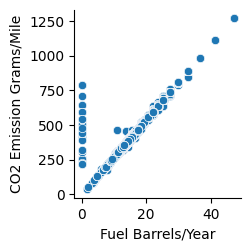

In [71]:
import seaborn as sns
sns.pairplot(df, x_vars = "Fuel Barrels/Year", y_vars= 'CO2 Emission Grams/Mile')

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [72]:
# We are using the simple linear regression

# My outcome variable is CO2 Emission Grams/Mile since we are
# trying to predict the amount of CO2 Emission Grams/Mile based on Fuel Barrels/Year

# Reshape the data to fit the model
X = df[['Year', 'Cylinders', 'Fuel Barrels/Year', 'Combined MPG', 'Fuel Cost/Year']]
y = df['CO2 Emission Grams/Mile'].values

# Create the linear regression model
model = LinearRegression()
model.fit(X, y)

# Get the slope (coefficient) and intercept of the line
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values
y_pred = model.predict(X)


In [75]:
# Variables of the car for which you want to predict co2 emissions
new_car = [2012, 6, 70, 12, 2000]

# Reshape the variable values into a 2D array
new_car_reshaped = np.array(new_car).reshape(1, -1)

# Use the model to predict co2 emissions for the given parameters
predicted_co2 = model.predict(new_car_reshaped)

# Print the predicted co2 emissions
print(f'The predicted CO2 emissions for the car are : {predicted_co2[0]}')
print()
print()
print()

The predicted CO2 emissions for the car are : 1497.9191382380418





C:\Users\pieri\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [76]:
#Year, cylinders, Fuel Barrels/Year, Combined MPG, Fuel Cost/Year
model.coef_

array([-0.32061673,  1.87879976, 19.05292507, -3.04039938,  0.03230948])

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [78]:
model.intercept_

769.888283646566

In [79]:
import statsmodels.api as sm
est = sm.OLS(y, X) # Creates an object OLS estimator
est = est.fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          6.092e+06
Date:                Thu, 23 May 2024   Prob (F-statistic):                        0.00
Time:                        17:58:16   Log-Likelihood:                     -1.5250e+05
No. Observations:               35952   AIC:                                  3.050e+05
Df Residuals:                   35947   BIC:                                  3.050e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
#The most important variable is Fuel Barrels/Year, it has the highest correlation to the CO2 emissions and the highest coefficient in the linear regression is 19.05292507
#In order of coefficient comes next: Combined MPG, Cylinders, Year and Fuel Cost/Year

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here.

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

*your explanation here*

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [2]:
# Your response here.

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

*your explanation here*